### Introduction to neural network classification with Tensorflow

In this notebook we're going to learn to write neural network for classification problems

A classification problem is where you try to classify something as one thing or another

A few types of classification problems:
1. Binary classification
2. Multiclass classification
3. Multilabel classification

In [19]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)


In [20]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [21]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [23]:
import pandas as pd

circle = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label': y})
circle

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


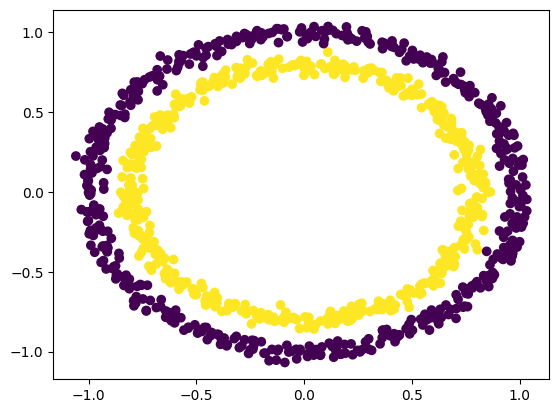

In [24]:
import matplotlib.pyplot as plt

plt.scatter(circle['X0'], circle['X1'], c=y)

In [25]:
from sklearn.model_selection import train_test_split

X = circle.drop('label', axis=1)
y = circle['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

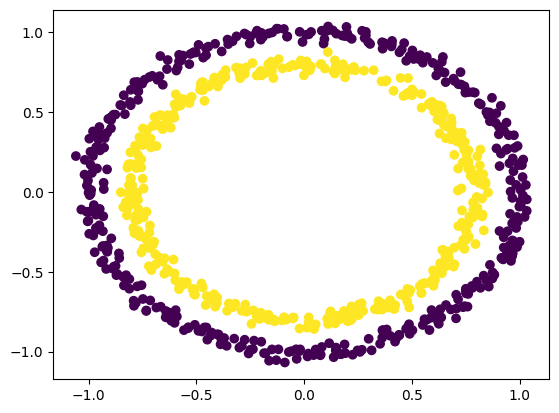

In [34]:
plt.scatter(X_train['X0'], X_train['X1'], c=y_train)

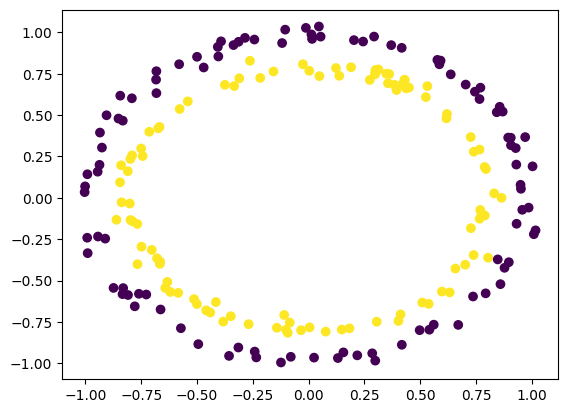

In [35]:
plt.scatter(X_test['X0'], X_test['X1'], c=y_test)

In [41]:
import tensorflow as tf
# first classification model
tf.random.set_seed(42)

# create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5130 - loss: 0.7186
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4983 - loss: 0.7118  
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4918 - loss: 0.7070 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4841 - loss: 0.7036 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4876 - loss: 0.7010 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4809 - loss: 0.6989  
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4732 - loss: 0.6971 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4765 - loss: 0.6955 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4793 - loss: 0.6940 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4867 - loss: 0.6927 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4910 - loss: 0.6915 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [43]:
model1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9002 - loss: 0.5690  


[0.5766985416412354, 0.8949999809265137]

In [44]:
import numpy as np

In [65]:
x_min, x_max = X_train['X0'].min() - 0.1, X_train['X0'].max() + 0.1
y_min, y_max = X_train['X1'].min() - 0.1, X_train['X1'].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model1.predict(grid)

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [66]:
Z.shape

(53130, 1)

In [67]:
Z = Z.reshape(xx.shape)

In [68]:
Z.shape

(231, 230)

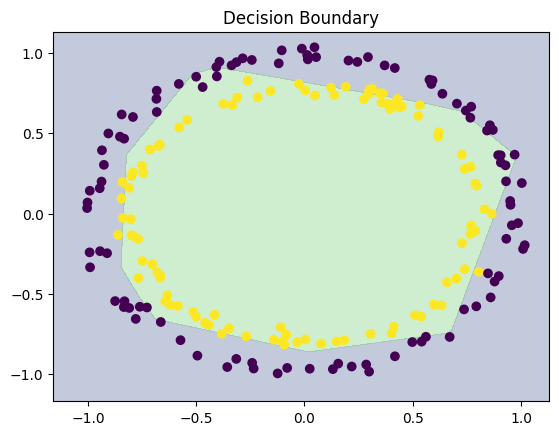

In [76]:
plt.contourf(xx, yy, Z, levels=1, alpha=0.3, cmap='viridis')
plt.scatter(X_test['X0'], X_test['X1'], c=y_test)
plt.title('Decision Boundary')
plt.show()

In [84]:
def plot_contour(model, X0, X1, y):
  x_min, x_max = X0.min() - 0.1, X0.max() + 0.1
  y_min, y_max = X1.min() - 0.1, X1.max() + 0.1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(y_min, y_max, 0.01))

  grid = np.c_[xx.ravel(), yy.ravel()]
  Z = model1.predict(grid)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, levels=1, alpha=0.3, cmap='viridis', linewidths=2)
  plt.scatter(X0, X1, c=y)
  plt.title('Decision Boundary')
  plt.show()

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


<ipython-input-84-372a32685114>:11: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, levels=1, alpha=0.3, cmap='viridis', linewidths=2)


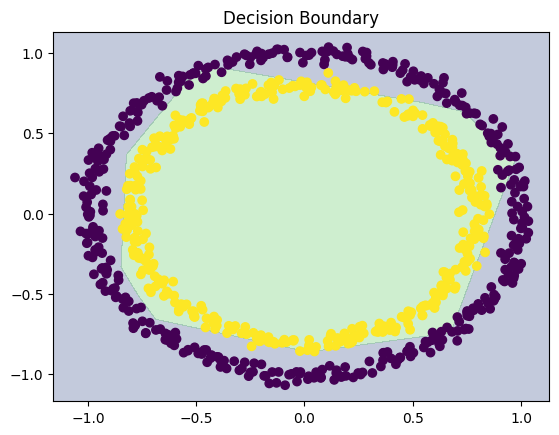

In [85]:
plot_contour(model=model1,
             X0=X_train['X0'],
             X1=X_train['X1'],
             y=y_train)

<Axes: >

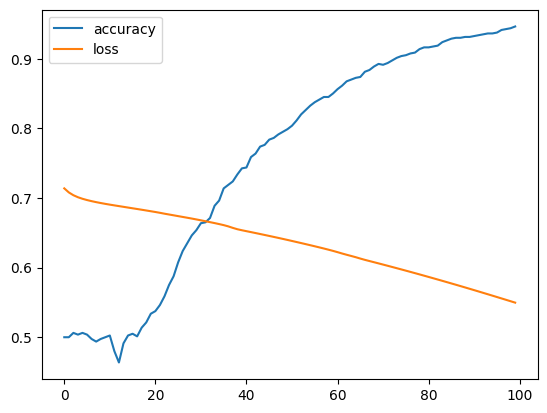

In [86]:
pd.DataFrame(history1.history).plot()